<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/HW2/hw2.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---
# First part - Intro
---

#1. Прочитайте csv файл (використовуйте функцію read_csv)

In [ ]:
data = pd.read_csv('bestsellers with categories.csv')
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


#2. Виведіть перші п'ять рядків (використовується функція head)

In [ ]:
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


#3. Виведіть розміри датасету (використовуйте атрибут shape)

In [ ]:
print(f" Кількість рядків: \033[1m{data.shape[0]}\033[0m \n Кількість стопчиків: \033[1m{data.shape[1]}\033[0m")

 Кількість рядків: 550 
 Кількість стопчиків: 7


#4. Відповідь: Про скільки книг зберігає дані датасет?

In [ ]:
books_in_dataset = len(data['Name'].unique())
print(f'Датасет зберігає \033[1m{books_in_dataset}\033[0m унікальних книг')

Датасет зберігає 351 унікальних книг


#5. snake_style re-naming for columns

In [ ]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
data.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

---
# Part Two - Primary data research
---

#2.1 Перевірте, чи у всіх рядків вистачає даних:
виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
Відповідь: Чи є в якихось змінних пропуски? (Так / ні)

In [ ]:
missing_values = data.isna().sum()
print(missing_values, end='\n\n')

answer = 'Tak' if missing_values.sum() > 0 else 'Ні'

if answer == 'Tak':
    columns_with_missing = missing_values[missing_values>0].index.to_list()
    print(f'Пропуски є в наступних змінних: \033[1m{", ".join(columns_with_missing)}\033[0m')
print(f'\033[1mВідповідь:\033[0m Чи є в якихось змінних пропуски? (\033[1m{answer})\033[0m')

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Відповідь: Чи є в якихось змінних пропуски? (Ні)


#2.2 Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
Відповідь: Які є унікальні жанри?

In [ ]:
# unique_genres = data['genre'].unique()
unique_genres = data.genre.unique()

print(f'Відповідь: Які є унікальні жанри? \033[1m{", ".join(unique_genres)}\033[0m')

Відповідь: Які є унікальні жанри? Non Fiction, Fiction


#2.3 Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
    Відповідь: Максимальна ціна?
    Відповідь: Мінімальна ціна?
    Відповідь: Середня ціна?
    Відповідь: Медіанна ціна?

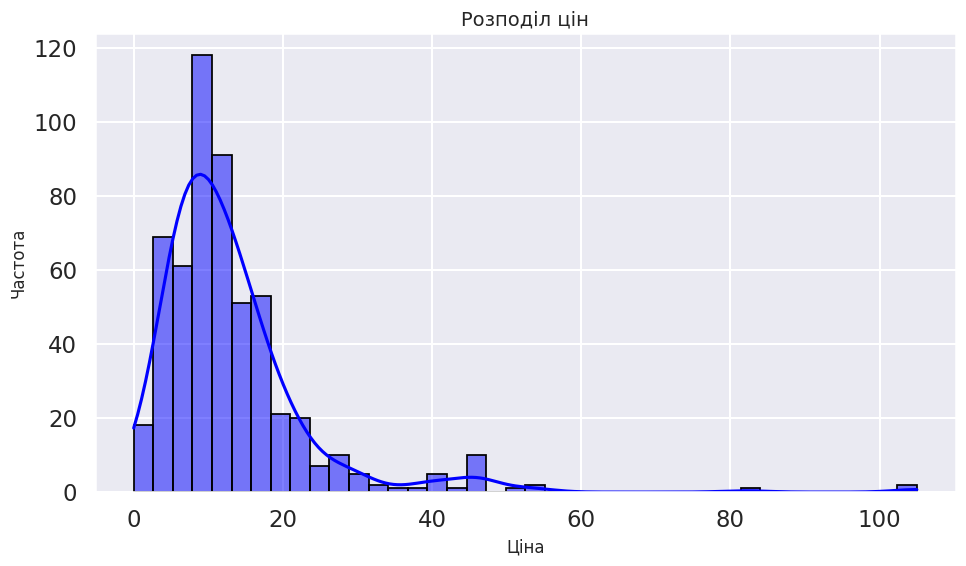

Відповідь: Максимальна ціна? 105
Відповідь: Мінімальна ціна? 0
Відповідь: Середня ціна? 13.1
Відповідь: Медіанна ціна? 11.0


In [ ]:
sns.set_theme(style='darkgrid', context='talk', )

plt.figure(figsize=(10, 6))
# data['price'].plot(kind='hist', bins=40, color='blue', edgecolor='black', alpha=0.7)
sns.histplot(data['price'], kde=True, bins=40, edgecolor='black', color='blue')

plt.title('Розподіл цін', fontsize=14)
plt.xlabel('Ціна', fontsize=12)
plt.ylabel('Частота', fontsize=12)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.tight_layout()
plt.show()

max_price = data['price'].max()
min_price = data['price'].min()
mean_price = data['price'].mean()
median_price = data['price'].median()

print(f'Відповідь: Максимальна ціна? \033[1m{max_price}\033[0m')
print(f'Відповідь: Мінімальна ціна? \033[1m{min_price}\033[0m')
print(f'Відповідь: Середня ціна? \033[1m{mean_price}\033[0m')
print(f'Відповідь: Медіанна ціна? \033[1m{median_price}\033[0m')




---
# Part Three - Searching and Sorting Data
---

In [ ]:
# Який рейтинг у датасеті найвищий? Відповідь:
max_user_rating = data.user_rating.max()
print(f'Максимальний рейтинг користувача: \033[1m{max_user_rating}\033[0m')

# Скільки книг мають такий рейтинг? Відповідь:
data_MUR = data['user_rating'] == max_user_rating
books_qty_with_MUR = data_MUR.sum()
print(f'Найвищий рейтинг мають \033[1m{books_qty_with_MUR}\033[0m книг у датасеті, серед яких унікальних назв: \033[1m{len(data[data_MUR]["name"].unique())}\033[0m')

# Яка книга має найбільше відгуків? Відповідь:
max_review = data.reviews.max()
data_MR = data.reviews == max_review
# book_name = data[data_MR]['name'].iloc[0]
book_name = data[data_MR]['name'].values[0]
print(f'Найбільше відгуків має книга \033[1m"{book_name}"\033[0m')

# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:
data_2015 = data[data['year'] == 2015]
top_50_books_in_2015 = data_2015.sort_values('user_rating', ascending=False).head(50)
max_price_book_in_top_2015 = top_50_books_in_2015.sort_values('price', ascending=False).iloc[0]
most_expensive_2015_name = max_price_book_in_top_2015['name']
most_expensive_2015_price = max_price_book_in_top_2015['price']
print(f'Найдорожча книга у 2015 році \033[1m"{most_expensive_2015_name}"\033[0m і коштувала \033[1m{most_expensive_2015_price}$.\033[0m')

# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:
top_50 = data[data_MUR].head(50)
fiction_2010_from_top_50 = top_50[(top_50['year'] == 2010) & (top_50['genre'] == 'Fiction')]
fiction_2010_from_top_50_QTY = fiction_2010_from_top_50['name'].sum()
# fiction_2010_from_top_50 = data[(data['user_rating'] == data_MUR) & (data['year'] == 2010) & (data['genre'] == 'Fiction')]
fiction_2010 = (data['year'] == 2010) & (data['genre'] == 'Fiction')
fiction_2010_QTY = fiction_2010.sum()
print(f'В топ 50 з найвищим рейтингом потрапило \033[1m{fiction_2010_from_top_50_QTY}\033[0m книг Fiction 2010 року')
print(f'Алє у 2010 року було \033[1m{fiction_2010_QTY}\033[0m книг Fiction')

# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:
books_with_4_9_in_2010_2011 = data[(data['user_rating'] == 4.9) & (data['year'].isin([2010, 2011]))]
num_books_4_9_2010_2011 = len(books_with_4_9_in_2010_2011)
print(f'Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: \033[1m{num_books_4_9_2010_2011}\033[0m')

# відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
books_2015_under_8 = data[(data['year'] == 2015) & (data['price'] < 8)]
sorted_books_2015_under_8 = books_2015_under_8.sort_values('price', ascending=False)
sorted_books_2015_under_8

# Яка книга остання у відсортованому списку? Відповідь:
last_name_in_sorted = sorted_books_2015_under_8.iloc[-1]['name']
print(f'Остання кніга у відсортованному списку - \033[1m"{last_name_in_sorted}"\033[0m')


Максимальний рейтинг користувача: 4.9
Найвищий рейтинг мають 52 книг у датасеті, серед яких унікальних назв: 28
Найбільше відгуків має книга "Where the Crawdads Sing"
Найдорожча книга у 2015 році "Publication Manual of the American Psychological Association, 6th Edition" і коштувала 46$.
В топ 50 з найвищим рейтингом потрапило 0 книг Fiction 2010 року
Алє у 2010 року було 20 книг Fiction
Кількість книг з рейтингом 4.9, що потрапили до рейтингу у 2010 та 2011 роках: 1
Остання кніга у відсортованному списку - "To Kill a Mockingbird"


---
# Part Four. Aggregating Data and Joining Tables
---

In [ ]:
# Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з
# жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних
# та максимальних значень використовуйте max та min). Не беріть усі стовпці,
# виберіть тільки потрібні вам :

    # Відповідь: Максимальна ціна для жанру Fiction: Відповідь
    # Відповідь: Мінімальна ціна для жанру Fiction: Відповідь
    # Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь
    # Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

genre_price_stats = data.groupby('genre')['price'].agg(['min', 'max']).reset_index()

print(genre_price_stats)
print("============")
for _, row in genre_price_stats.iterrows():
    genre = row['genre']
    max_price = row['max']
    min_price = row['min']
    print(f"Відповідь: Максимальна ціна для жанру {genre}: {max_price}")
    print(f"Відповідь: Мінімальна ціна для жанру {genre}: {min_price}")

print("============")

         genre  min  max
0      Fiction    0   82
1  Non Fiction    0  105
Відповідь: Максимальна ціна для жанру Fiction: 82
Відповідь: Мінімальна ціна для жанру Fiction: 0
Відповідь: Максимальна ціна для жанру Non Fiction: 105
Відповідь: Мінімальна ціна для жанру Non Fiction: 0


In [ ]:

    # Тепер створіть новий датафрейм, який вміщатиме кількість книг для
    # кожного з авторів (використовуйте функції groupby та agg, для підрахунку
    # кількості використовуйте count).
    # Не беріть усі стовпці, виберете тільки потрібні

        # Відповідь: Якої розмірності вийшла таблиця? Відповідь:
        # Відповідь: Який автор має найбільше книг? Відповідь:
        # Відповідь: Скільки книг цього автора? Відповідь:

# books_by_author = data.groupby('author').agg({"name": "count"}).reset_index()
# books_by_author.rename(columns={'name': 'book_count'}, inplace=True)
books_by_author = data.groupby('author').size().reset_index(name='book_count')
top_author = books_by_author.loc[books_by_author['book_count'].idxmax()]

print(f"Якої розмірності вийшла таблиця? Відповідь: {books_by_author.shape}")
print(f"Який автор має найбільше книг? Відповідь: {top_author['author']}")
print(f"Скільки книг цього автора? Відповідь: {top_author['book_count']}")

Якої розмірності вийшла таблиця? Відповідь: (248, 2)
Який автор має найбільше книг? Відповідь: Jeff Kinney
Скільки книг цього автора? Відповідь: 12


In [ ]:
# Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного
# автора (використовуйте функції groupby та agg, для підрахунку середнього
# значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

    # Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:
    # Відповідь: Який у цього автора середній рейтинг? Відповідь:

# authors_ratings = data.groupby('author').agg({'user_rating': 'mean'}).reset_index()
# authors_ratings.rename(columns={'user_rating': 'mean_rating'}, inplace=True)
# authors_ratings

authors_ratings = data.groupby('author')['user_rating'].mean().reset_index(name='mean_rating')
min_mean_rating_index = authors_ratings['mean_rating'].idxmin()
min_mean_rating_author = authors_ratings.loc[min_mean_rating_index, 'author']
min_mean_rating_value = authors_ratings.loc[min_mean_rating_index, 'mean_rating']
# print(authors_ratings)
print(f"Автор з найменшим рейтингом {min_mean_rating_author}")
print(f'Середній рейтинг цього автора {min_mean_rating_value}')

Автор з найменшим рейтингом Donna Tartt
Середній рейтинг цього автора 3.9


In [ ]:

    # З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг
    # (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну
    # Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
    # Відповідь: Який автор перший у списку?

# joined_data = pd.concat([books_by_author, authors_ratings['mean_rating']],axis=1)
joined_data = pd.merge(books_by_author, authors_ratings, on='author')
sorted_data = joined_data.sort_values(['book_count', 'mean_rating'], ascending=False)
first_author = sorted_data.author.iloc[0]
first_rating = sorted_data.mean_rating.iloc[0]
print(sorted_data)
print(f'У першому списку {first_author} із середнім рейтингом {first_rating} і кількістью {sorted_data.book_count.iloc[0]} книг')

                                 author  book_count  mean_rating
120                         Jeff Kinney          12     4.800000
197                        Rick Riordan          11     4.772727
92                         Gary Chapman          11     4.736364
226                     Suzanne Collins          11     4.663636
11   American Psychological Association          10     4.500000
..                                  ...         ...          ...
198                            Rob Bell           1     4.200000
43                         Chris Cleave           1     4.100000
109                   Ian K. Smith M.D.           1     4.100000
186                        Pierre Dukan           1     4.100000
171                      Muriel Barbery           1     4.000000

[248 rows x 3 columns]
У першому списку Jeff Kinney із середнім рейтингом 4.8 і кількістью 12 книг


---
# Part Five - Visualization
---

додайте від 3 до 5 графіків функцій різного типу на ваш вибір. Задайте графікам оформлення, щоб кожен графік у своїй домашній роботі чимось відрізнявся і не був схожим на інші. Можна використовувати як matplotlib, так і seaborn.

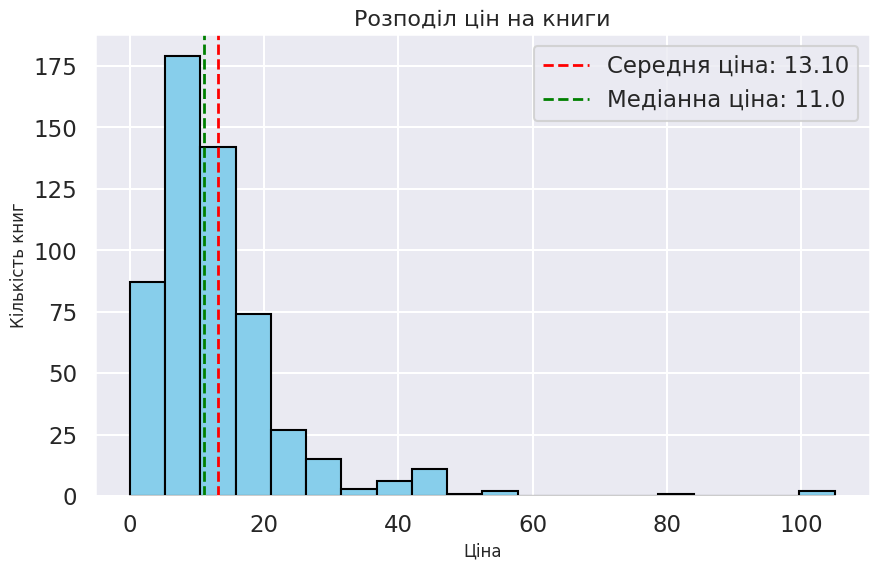

Середня ціна книг: 13.10
Медіанна ціна книг: 11.0
Максимальна ціна книги: 105
Мінімальна ціна книги: 0


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл цін на книги', fontsize=16)
plt.xlabel('Ціна', fontsize=12)
plt.ylabel('Кількість книг', fontsize=12)

price_mean = data['price'].mean()
plt.axvline(price_mean, color='red', linestyle='dashed', linewidth=2, label=f'Середня ціна: {price_mean:.2f}')

price_median = data['price'].median()
plt.axvline(price_median, color='green', linestyle='dashed', linewidth=2, label=f'Медіанна ціна: {price_median}')

plt.grid(True)
plt.legend()
plt.show()

price_max = data['price'].max()
price_min = data['price'].min()

print(f"Середня ціна книг: {price_mean:.2f}")
print(f"Медіанна ціна книг: {price_median}")
print(f"Максимальна ціна книги: {price_max}")
print(f"Мінімальна ціна книги: {price_min}")


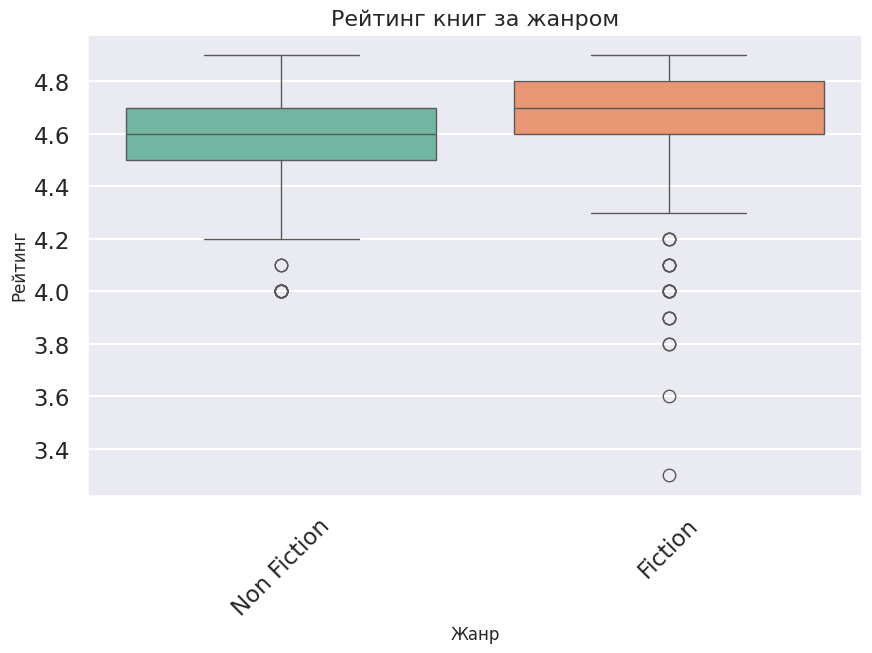

Середній рейтинг за жанрами:
genre
Fiction        4.648333
Non Fiction    4.595161
Name: user_rating, dtype: float64

Максимальний рейтинг за жанрами:
genre
Fiction        4.9
Non Fiction    4.9
Name: user_rating, dtype: float64

Мінімальний рейтинг за жанрами:
genre
Fiction        3.3
Non Fiction    4.0
Name: user_rating, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='user_rating', hue='genre', data=data, palette='Set2')
plt.title('Рейтинг книг за жанром', fontsize=16)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.xticks(rotation=45)
plt.show()

genre_rating_mean = data.groupby('genre')['user_rating'].mean()
genre_rating_max = data.groupby('genre')['user_rating'].max()
genre_rating_min = data.groupby('genre')['user_rating'].min()

print("Середній рейтинг за жанрами:")
print(genre_rating_mean)
print("\nМаксимальний рейтинг за жанрами:")
print(genre_rating_max)
print("\nМінімальний рейтинг за жанрами:")
print(genre_rating_min)

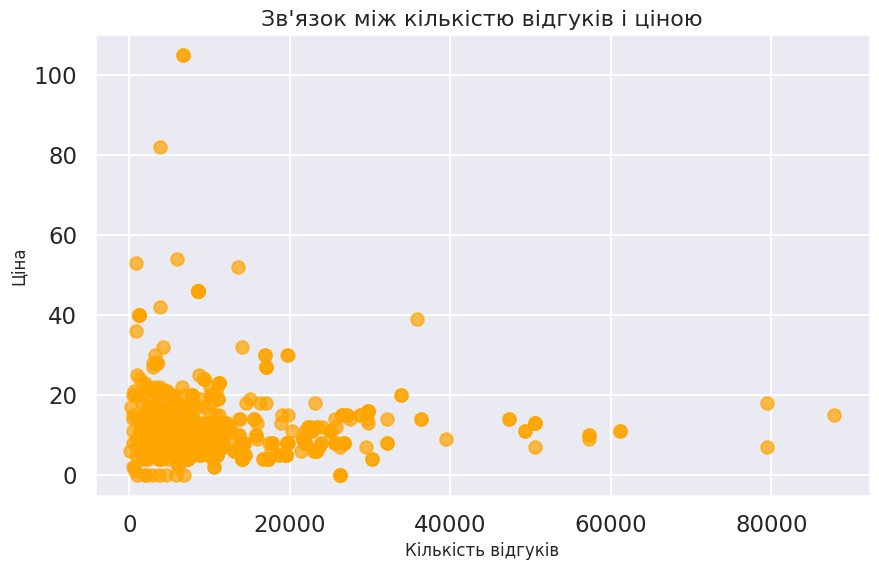

Кореляція між кількістю відгуків та ціною: -0.11
Інтерпретація: слабкий негативний зв'язок, який не є суттєвим, тобто є багато факторів, які впливають на ці два параметри, і цей зв'язок є дуже слабким


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['reviews'], data['price'], color='orange', alpha=0.7)
plt.title('Зв\'язок між кількістю відгуків і ціною', fontsize=16)
plt.xlabel('Кількість відгуків', fontsize=12)
plt.ylabel('Ціна', fontsize=12)
plt.grid(True)
plt.show()

reviews_price_corr = data[['reviews', 'price']].corr().iloc[0, 1]

if reviews_price_corr == 1:
    correlation_interpretation = "сильний позитивний зв'язок (якщо одне значення зростає, інше теж зростає)"
elif reviews_price_corr == 0:
    correlation_interpretation = "відсутність лінійного зв'язку"
elif reviews_price_corr == -1:
    correlation_interpretation = "сильний негативний зв'язок (якщо одне значення зростає, інше зменшується)"
elif reviews_price_corr > 0:
    correlation_interpretation = "позитивний зв'язок (якщо одне значення зростає, інше також має тенденцію до зростання)"
else:
    correlation_interpretation = "слабкий негативний зв'язок, який не є суттєвим, тобто є багато факторів, які впливають на ці два параметри, і цей зв'язок є дуже слабким"

print(f"Кореляція між кількістю відгуків та ціною: {reviews_price_corr:.2f}")
print(f"Інтерпретація: {correlation_interpretation}")

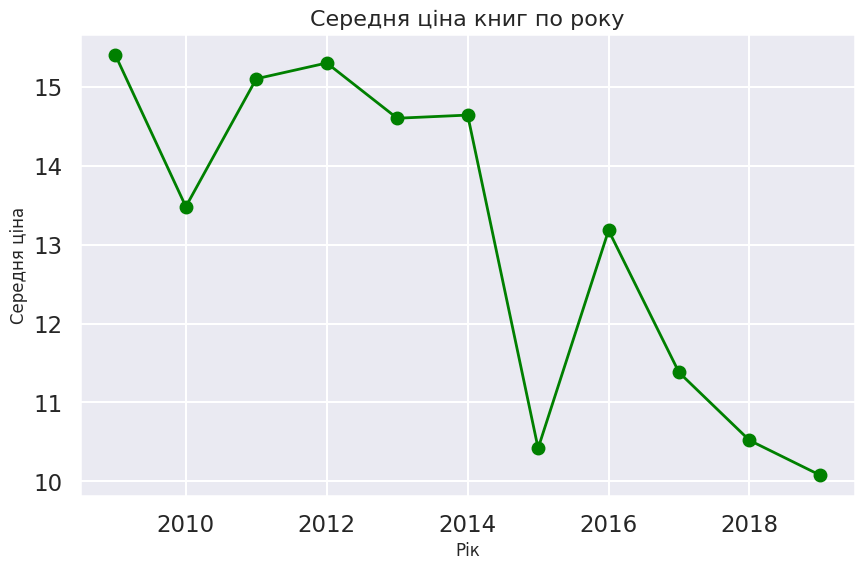

Максимальна середня ціна була в 2009.0: 15.4
Мінімальна середня ціна була в 2019.0: 10.08


In [ ]:
data_grouped = data.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data_grouped['year'], data_grouped['price'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Середня ціна книг по року', fontsize=16)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Середня ціна', fontsize=12)
plt.grid(True)
plt.show()

# Виведення підсумку
price_year_max = data_grouped.loc[data_grouped['price'].idxmax()]
price_year_min = data_grouped.loc[data_grouped['price'].idxmin()]
print(f"Максимальна середня ціна була в {price_year_max['year']}: {price_year_max['price']}")
print(f"Мінімальна середня ціна була в {price_year_min['year']}: {price_year_min['price']}")

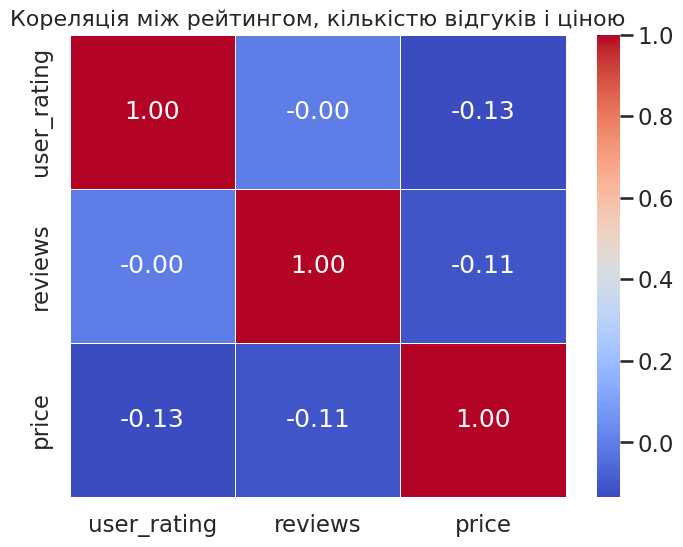

Кореляційна матриця:
             user_rating   reviews     price
user_rating     1.000000 -0.001729 -0.133086
reviews        -0.001729  1.000000 -0.109182
price          -0.133086 -0.109182  1.000000


In [ ]:
correlation_matrix = data[['user_rating', 'reviews', 'price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Кореляція між рейтингом, кількістю відгуків і ціною', fontsize=16)
plt.show()

# Виведення підсумку
print("Кореляційна матриця:")
print(correlation_matrix)